<a href="https://colab.research.google.com/github/Karthik-Aravapalli/CSE-572-Data-Mining/blob/main/HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
# Load the dataset
data = pd.read_csv("train.csv")

# Fill missing values
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data.drop(['Cabin'], axis=1, inplace=True)

# Encoding categorical features
data = pd.get_dummies(data, columns=['Sex', 'Embarked'])

# Drop columns that may not be useful
data.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

# Split the data
X = data.drop("Survived", axis=1)
y = data["Survived"]


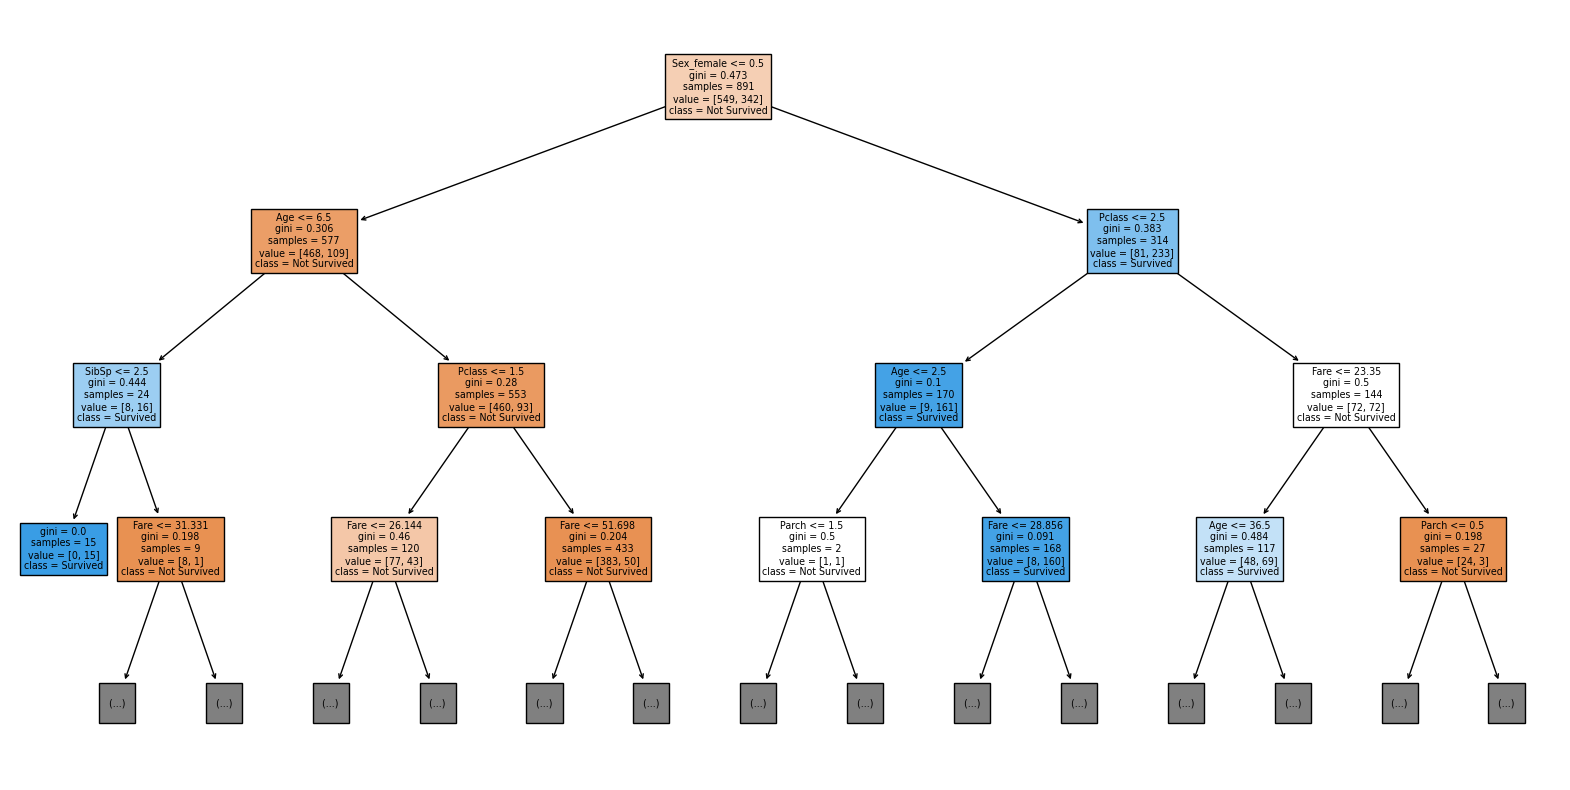

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plotting the tree---
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], max_depth=3)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, y, cv=5)
avg_score_dt = scores.mean()

print(f"Average Classification Accuracy for Decision Tree: {avg_score_dt:.2f}")

Average Classification Accuracy for Decision Tree: 0.77


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
scores_rf = cross_val_score(rf, X, y, cv=5)
avg_score_rf = scores_rf.mean()

print(f"Average Classification Accuracy for Random Forest: {avg_score_rf:.2f}")

Average Classification Accuracy for Random Forest: 0.80
